# TNM112 -- Lab 1
Instructions about the different tasks are specified in this notebook. However, for more details, please see the PDF with lab instructions. Also see the lab report template for information on how to report your results.

### Data generation
Look through the "data_generator.py" code to understand how the dataset is generated and plotted.

The "importlib" library is used to enable reloading of a library each time the cell is executed (so that changes to the imported script will be visible without restarting the notebook).

In [1]:
import importlib
import data_generator
importlib.reload(data_generator)

data = data_generator.DataGenerator()
# data.generate(dataset='polar', N_train=512, N_test=512, K=5, sigma=0.05)
# data.plot()

### Keras MLP
Look through the "keras_mlp.py" code to understand how the model is setup and trained.

#### Task 1.1
Use a linear dataset with N_train = 512 and K = 2. Specify a network without hidden layers. Compare:
* Training for 4 epochs with learning rate 1.0 and batch size 512
* Training for 4 epochs with learning rate 1.0 and batch size 16

Answer the following questions:
* Which model is best at separating the two classes (provide the accuracy on the test set)? Why is this the case? (Hint: how many iterations of SGD are performed in the two cases?)
* Why is it possible to do the classification without non-linear activation function (there's only a softmax activation)?

#### Task 1.2
Use a polar dataset with N_train = 512 and K = 2. Specify a network with one hidden layer with 5 neurons. Train for 20 epochs with learning rate 1.0 and batch size 16. Compare:
* Using linear activation function
* Using sigmoid activation function
* Using relu activation function

Answer the following questions:
* Why does linear activation not work?
* On average, what is the best classification accuracy that can be achieved with a linear activation function?
* Can you find an explanation for the difference comparing sigmoid and relu activation?

#### Task 1.3
Use a polar dataset with N_train = 512, K = 5, and sigma=0.05. Specify a network with 10 hidden layers with 50 neurons each and relu activation. Try different combinations of hyper parameters to get the best classification accuracy. Examples could be:
* Change mean and stddev of normal initialization.
* Change learning rate and add some momentum in SGD.
* Check the Keras documentation for 'ExponentialDecay', which can be used to specify decaying learning rate for SGD.
* You can also tweak batch size and number of epochs.

What combination worked best, and what was your best classification accuracy (on the test set)? Can you find any patterns in what combinations of hyper parameters work and doesn't work?

#### Task 1.4
Continue from previous task, but change initialization to 'glorot_normal' and optimizer to 'keras.optimizers.Adam()'. Does this perform better compared to your results in Task 1.3?

Data specification:
	Dataset type:           linear
	Number of classes:      2
	Std of classes:         0.1
	Training data shape:    (1024, 2)
	Validation data shape:  (1024, 2)
	Test data shape:        (1024, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
64/64 [==============================] - 1s 5ms/step - loss: 0.1650 - accuracy: 0.8516 - val_loss: 0.1061 - val_accuracy: 0.9580
Epoch 2/4
64/64 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 0.9844 - val_loss: 0.0660 - val_accuracy: 0.9844
Epoch 3/4
64/64 [==============================] - 0s 4ms/ste

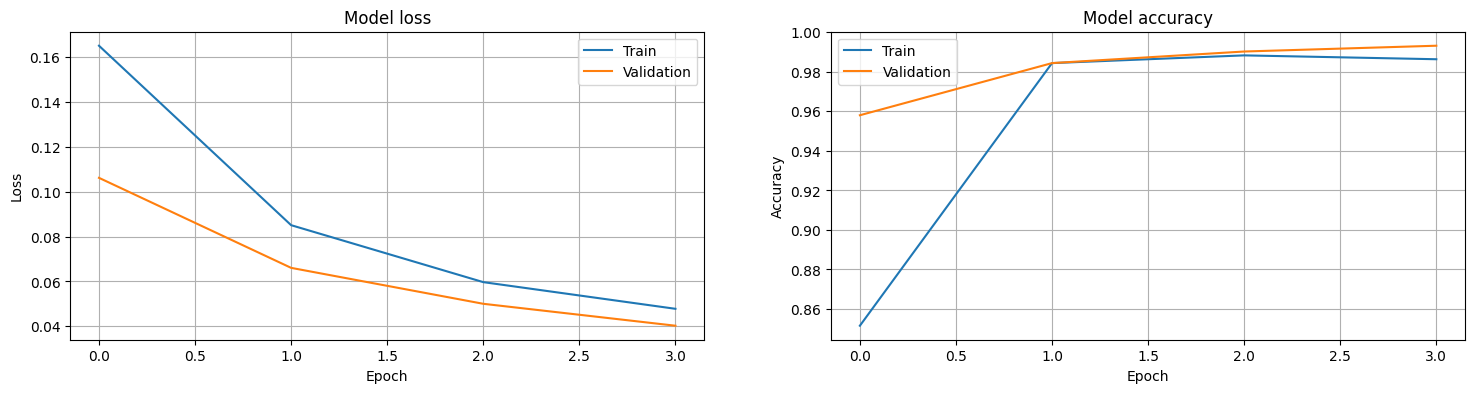

Model performance:
32/32 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9873
	Train loss:     0.0433
	Train accuracy: 98.73
32/32 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9932
	Test loss:      0.0422
	Test accuracy:  99.32
512/512 [==============================] - 1s 1ms/step


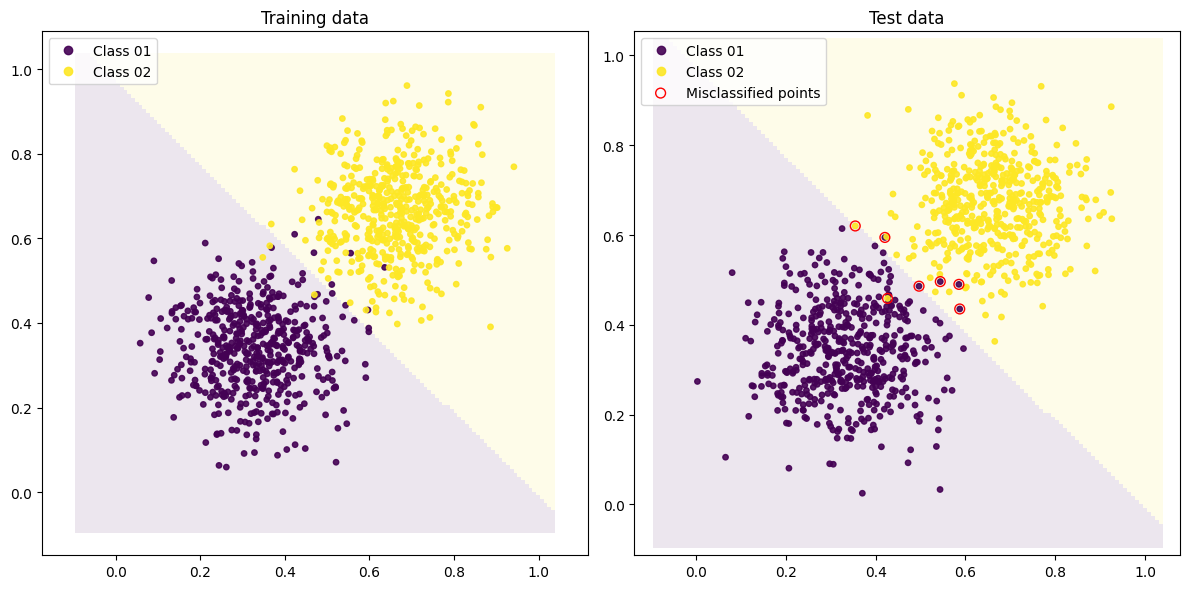

In [5]:
import keras_mlp
importlib.reload(keras_mlp) 

from tensorflow import keras

# Uncomment to be able to change data specification (instead of having to run the above cell every time)
data.generate(dataset='linear', N_train=512, N_test=512, K=2, sigma=0.1) # Task 1.1
#data.generate(dataset='polar', N_train=512, N_test=512, K=2, sigma=0.1)  # Task 1.2
#data.generate(dataset='polar', N_train=512, N_test=512, K=5, sigma=0.05) # Task 1.3

# Hyper-parameters
hidden_layers = 3     # The number of hidden layers in the network (total number of layers will be L=hidden_layers+1)
layer_width = 5     # The number of neurons in each hidden layer
activation = 'linear' # Activation function of hidden layers
#init = keras.initializers.glorot_normal() # Initialization method (starting point for the optimization)
init = keras.initializers.RandomNormal(mean=0.1, stddev=0.1)
epochs = 4           # Number of epochs for the training
batch_size = 16    # Batch size to use in training
loss = keras.losses.MeanSquaredError() # Loss function
opt = keras.optimizers.SGD(learning_rate=1.0, momentum=0.0)
#opt = keras.optimizers.Adam(learning_rate=0.0001) # Optimizer

# The Keras MLP model
model_k = keras_mlp.KerasMLP(data, verbose=True)

# Setup the model with the specified hyper parameters
model_k.setup_model(hidden_layers=hidden_layers, layer_width=layer_width,
                    activation=activation, init=init)

# Compile the model with a loss function and optimizer
model_k.compile(loss_fn=loss, optimizer=opt)

# Train the model a certain number of epochs with a specified batch size
model_k.train(epochs=epochs, batch_size=batch_size)

# Plot the training progress
model_k.plot_training()

# Evaluate the model (loss and accuracy on the training and test data)
model_k.evaluate()

# Plot the dataset with decision boundaries generated by the trained model
data.plot_classifier(model_k)

### Our MLP
To make sure our implementation of the MLP works as intended, we can run inference using the weights we trained with Keras. Then we can see if we get the same results in terms of accuracy and the decision boundaries generated by the model.

#### Task 2
Implement the "activation", "setup_model", "feedforward", and "evaluate" functions in "mlp.py". Run this cell and compare the results to the results generated by the Keras model in the previous cell (compare number of weights, classification loss/accuracy, and the plots with decision boundaries). Test this for different specifications of the model in the previous cell (number of hidden layers, layer width, and activation function)

#### Task 3
Use the linear dataset with 2 classes (K=2). Change the specification of the model parameters. Instead of extracting the weights from the Keras model, you should manually specify a weight matrix (2x2) and a bias vector (2x1), i.e. no hidden layers. Remember that each layer is supposed to be an item in a list, which means that you need to specify the weight matrix and the bias vector in separate 1-item lists. As we only have one layer, it will use the 'softmax' activation function.
* Manually derive weights and biases to specify a model that draws a decision boundary at x2 = 1-x1. What is the simplest possible solution? How many additional solutions are possible?
* How can you, in the simplest way, change the weights/biases to switch the predicted class labels?
* By writing out the output of the MLP, motivate why your choice of weights and biases creates a decision boundary at x2 = 1-x1. Can you find a general formula for specifying which combinations of weights and biases will generate the decision boundary?

Number of hidden layers:  10
Number of model weights:  23202
Model performance:
	Train loss:     0.0070
	Train accuracy: 0.99
	Test loss:      0.0052
	Test accuracy:  0.99


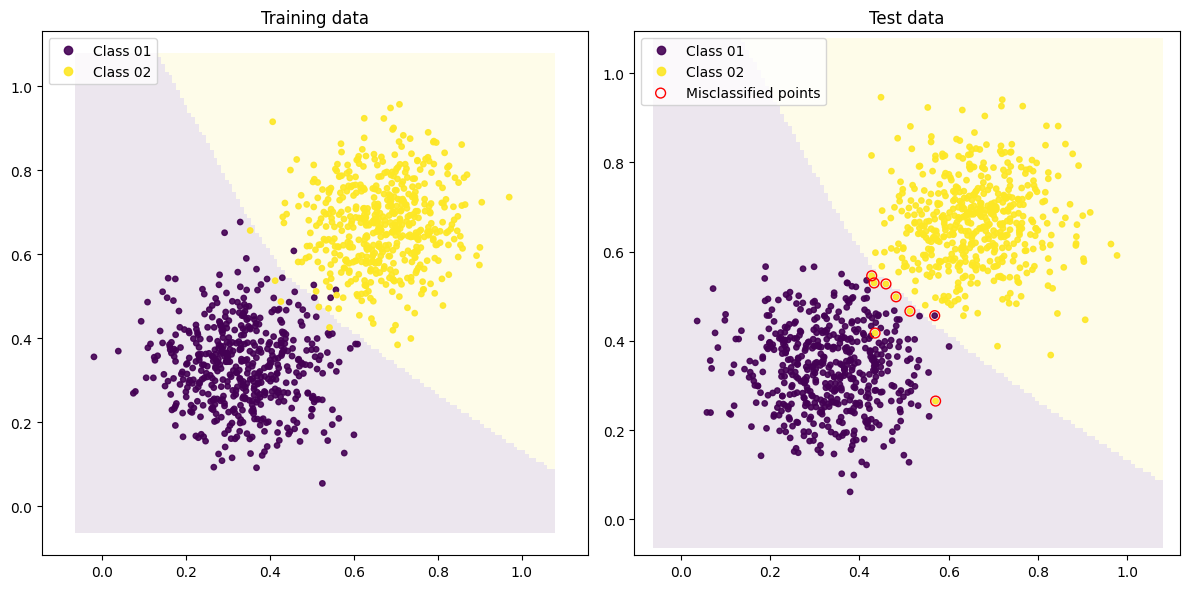

In [ ]:
import numpy as np
import mlp
importlib.reload(mlp)

# Get the weight matrices and biases of the trained Keras model
W, b = model_k.get_weights()

# Task 3: specify a weight matrix and a bias vector
#W = TODO
#b = TODO

# This is our implementation of an MLP, which we set to use the dataset we generated
model = mlp.MLP(data)

# Assign the weights and biases to the MLP and specify the activation function
model.setup_model(W, b, activation=activation)

# Evaluate the model (accuracy on the training and test data)
model.evaluate()

# Plot the dataset with decision boundaries generated by our MLP
data.plot_classifier(model)

Data specification:
	Dataset type:           linear
	Number of classes:      2
	Std of classes:         0.1
	Training data shape:    (1024, 2)
	Validation data shape:  (1024, 2)
	Test data shape:        (1024, 2)
Number of hidden layers:  0
Number of model weights:  6
Model performance:
	Train loss:     0.1767
	Train accuracy: 0.99
	Test loss:      0.1775
	Test accuracy:  0.99


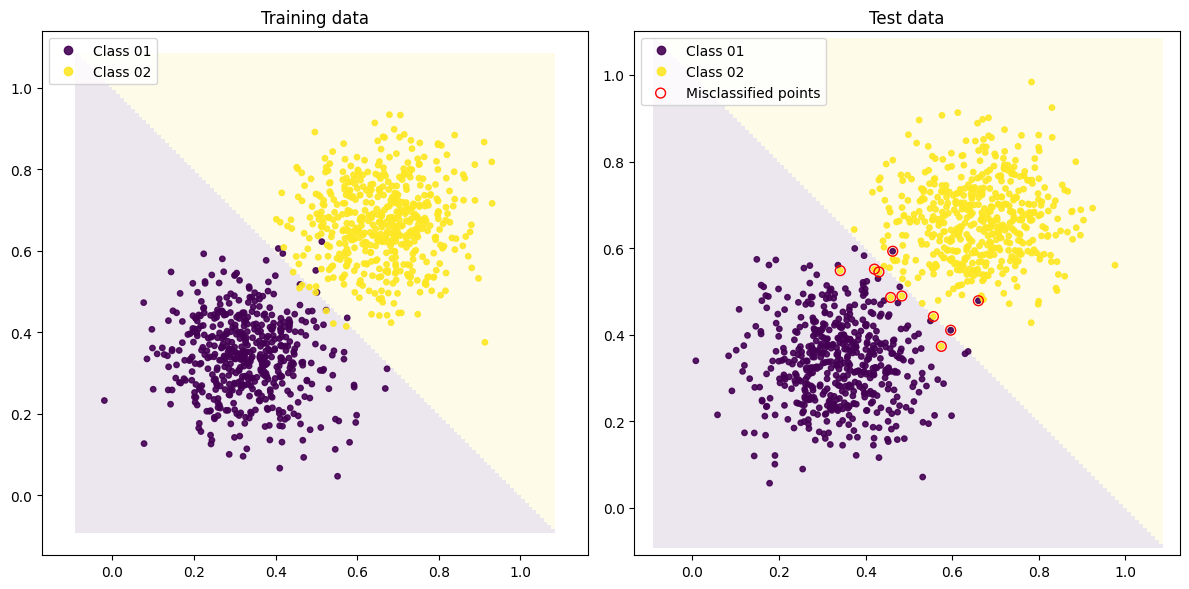

In [ ]:
import numpy as np
import mlp
importlib.reload(mlp)

data.generate(dataset='linear', N_train=512, N_test=512, K=2, sigma=0.1)

# Task 3: specify a weight matrix and a bias vector
W = [np.array([[-1,0],[0,1]])] 	
b = [np.array([[1],[0]])]

# This is our implementation of an MLP, which we set to use the dataset we generated
model = mlp.MLP(data)

# Assign the weights and biases to the MLP and specify the activation function
model.setup_model(W, b, activation=activation)

# Evaluate the model (accuracy on the training and test data)
model.evaluate()

# Plot the dataset with decision boundaries generated by our MLP
data.plot_classifier(model)